In [1]:
cd src

D:\Python\chess\src


In [2]:
import chess
from trainer import Trainer
from chessbot import ChessBot
from chessbot import model
import numpy as np
from pystockfish import Engine 

trainer = Trainer()
board = chess.Board()
chessbot = ChessBot()
stockfish = Engine(depth=20, param={"Threads": 6})
shitfish = Engine(depth=0, param={"Threads": 6})

Using TensorFlow backend.


0.593865573406


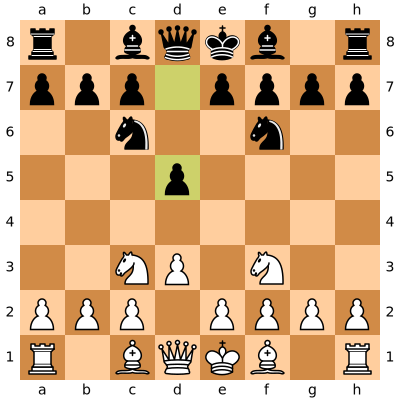

In [8]:
if board.is_game_over():
    print(board.result())
else:
    if board.turn == chess.WHITE:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(chessbot.best_move(board, eval=True))
    else:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(chessbot.best_move(board, eval=True))

board

In [66]:
board.pop()

Move.from_uci('c4a6')

In [6]:
%%timeit

print(chessbot.best_move(board, eval=True))

0.402747809887
g8f6
0.402747809887
g8f6
0.402747809887
g8f6
0.402747809887
g8f6
1 loop, best of 3: 5.51 s per loop


In [ ]:
board

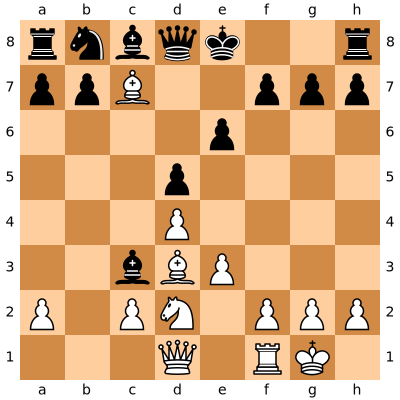

In [3]:
board.set_fen('rnbqk2r/ppB2ppp/4p3/3p4/3P4/2bBP3/P1PN1PPP/3Q1RK1 b kq - 0 10')
board

In [ ]:
chessbot.best_move(board)

In [214]:
while not board.is_game_over():
    if board.turn == chess.WHITE:
        board.push(chessbot.best_move(board, depth=1, eval=True))
        #board.push(trainer.best_move(board, filter=True))
    else:
        #board.push(trainer.best_move(board, filter=True))
        board.push(chessbot.best_move(board, eval=True))
print(board.result(), len(board.move_stack))

0.32236802578
0.382125914097
0.3299716115
0.454800605774
0.332804739475
0.437953591347
0.401887714863
0.493871092796
0.392687797546
0.458147346973
0.378207266331
0.459448993206
0.391526401043
0.433262646198
0.380127847195
0.431501030922
0.397943019867
0.410289049149
0.414425551891
0.424022734165
0.41456758976
0.415006101131
0.450267374516
0.409886598587
0.434815704823
0.439172327518
0.415100634098
0.440082848072
0.457704424858
0.464948773384
0.41992944479
0.446774840355
0.439461767673
0.455441057682
0.424766242504
0.550701528788
0.378319263458
0.56434071064
0.368663072586
0.571637332439
0.380357921124
0.600314378738
0.337782144547
0.618498712778
0.339995086193
0.61741617322
0.3603271842
0.657968968153
0.357452750206
0.677415907383
0.361375033855
0.642061233521
0.37135797739
0.599350601435
0.352311849594
0.566418617964
0.379492640495
0.575873285532
0.360590815544
0.579756200314
0.377294421196
0.56969422102
0.363182902336
0.633603364229
0.432116210461
0.64691144228
0.348691821098
0.64141

In [213]:
board.reset()

In [3]:
print(trainer.test_winrate())

0.0


In [3]:
board, won = trainer.play_vs_stockfish(True, shitfish, True)

In [4]:
print(won)

False


In [5]:
temp_board = chess.Board()
move_num = 0

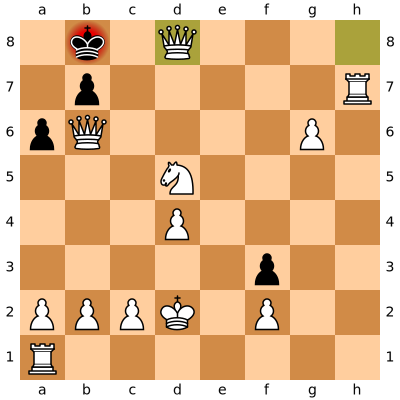

In [77]:
if len(board.move_stack) > move_num:
    temp_board.push(board.move_stack[move_num])
    move_num += 1

temp_board

In [ ]:
#file = open("ficsgamesdb_2016_standard2000_nomovetimes_1435145.pgn")
file = open("ficsgamesdb_2016_chess_nomovetimes_1445486.pgn")

In [ ]:
game = chess.pgn.read_game(file)
board = game.end().board()

In [ ]:
game.headers['Result']

In [ ]:
trainer.train_from_match(board, game.headers['Result'])

In [1]:
cd src

D:\Python\chess\src


In [2]:
from model_twostate import model

Using TensorFlow backend.


(None, 2, 8, 8, 240)
(None, 30720)


In [ ]:
board.reset()
board.push(chess.Move.from_uci('c2c4'))
trainer.best_move(board, eval=True)


board.push(chess.Move.from_uci('g8f6'))
print(board)

In [ ]:
batch_x = np.zeros(shape=(1, 8, 8, 12), dtype=np.int8)
batch_x[0] = chessbot.board_to_matrix(board)
model.predict_proba(batch_x)

In [3]:
stockfish.setfenposition('rnb1k2r/ppq2ppp/4p3/3p4/3P4/2bBPN2/P1P2PPP/3Q1RK1 b kq - 1 11')
stockfish.bestmove()

info depth 1 seldepth 1 multipv 1 score cp 868 nodes 688 nps 344000 tbhits 0 time 2 pv e8g8
info depth 2 seldepth 2 multipv 1 score cp 875 nodes 957 nps 319000 tbhits 0 time 3 pv b8c6 a2a3
info depth 3 seldepth 3 multipv 1 score cp 911 nodes 1262 nps 420666 tbhits 0 time 3 pv b8c6 a2a3 e8g8
info depth 4 seldepth 4 multipv 1 score cp 922 nodes 1907 nps 635666 tbhits 0 time 3 pv b8c6 a2a3 e8g8 h2h3
info depth 5 seldepth 5 multipv 1 score cp 925 nodes 3015 nps 753750 tbhits 0 time 4 pv b8c6 a2a3 b7b6 g2g3 e8g8
info depth 6 seldepth 6 multipv 1 score cp 949 nodes 9024 nps 1289142 tbhits 0 time 7 pv e8g8 h2h4 b7b6 g2g3 b8c6 h4h5
info depth 7 seldepth 8 multipv 1 score cp 911 nodes 18544 nps 2060444 tbhits 0 time 9 pv e8g8 f3d2 b8c6 d2b1 c6b4 a2a3 b4d3
info depth 8 seldepth 10 multipv 1 score cp 908 nodes 26414 nps 2641400 tbhits 0 time 10 pv b8c6 f3d2 c6b4 d3b5 c8d7 b5d7 c7d7 a2a3 b4c6 h2h3
info depth 9 seldepth 14 multipv 1 score cp 918 nodes 48031 nps 4002583 tbhits 0 time 12 pv b8c6 f3d2

{'info': {'depth': 20,
  'multipv': 1,
  'nodes': 33382909,
  'nps': 11762829,
  'pv': 'e8g8 f3g5 h7h6 d1h5 b8c6 f2f4 f7f5 g5f3 c7a5 a2a3 a5a3 g2g4 f5g4 f3e5 c6e7 e5g6 e7f5 g6f8 a3f8 d3f5 e6f5 h5g6',
  'score': {'eval': 'cp', 'value': 976},
  'seldepth': 28,
  'tbhits': 0,
  'time': 2838},
 'move': 'e8g8',
 'ponder': 'f3g5'}